### Original Version

The function 'graph' aims to plot and save graphs for variables in a data set based on their data type (numerical or categorical) for the purpose of univariate analysis .
We define function with 3 parameters-
data(compulsory) :takes in pandas dataframe
columns(optional,default=all columns) :takes list of variables for which to plot graphs
directory(optional,default=current working directory): takes file path where function saves graphs
Function plots histograms and boxplots for numerical variables and barplots for categorical variables.

In [1]:
def graph(data,columns=None,directory=None):    #Function defintion
    
    import numpy as np                          #Importing required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    import seaborn as sns
    
    if directory is None:                       #Default values for parameters
        directory=os.getcwd()
    if columns is None:
        columns=list(data.columns)
        
    #loop to print graphhs for each variable(Univariate plots)
            
    for column in columns:                      
        
        if (data[column].dtype=='float64') | (data[column].dtype=='int64'): #For Numerical Variables
            sns.distplot(data[column],kde=False,color='green')
            plt.title(column+' Histogram', fontsize=15)
            plt.xlabel(column, fontsize=10)
            plt.ylabel('Frequency', fontsize=10)
            plt.savefig(directory+'/'+column+'_HistPlot.png',bbox_inches='tight',pad_inches=1)
            plt.figure()
            
            box=sns.catplot(data=data,y=column,orient="v", kind="box",sharex=False,sharey=False)
            plt.title(column+' BoxPlot', fontsize=15)
            plt.savefig(directory+'/'+column+'_BoxPlot.png',bbox_inches='tight',pad_inches=1)
            plt.figure()
            
            
        else: 
            #For Categorical Variables
            
            bar=sns.catplot(y=column, kind="count",data=data,orient='v')
            plt.title(column+' Bar Graph', fontsize=15)
            plt.xlabel(column, fontsize=10)
            plt.ylabel('Count', fontsize=10)
            plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
            plt.figure()
            

Testing Function

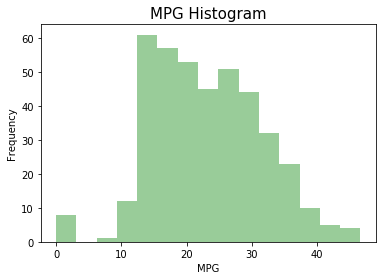

<Figure size 432x288 with 0 Axes>

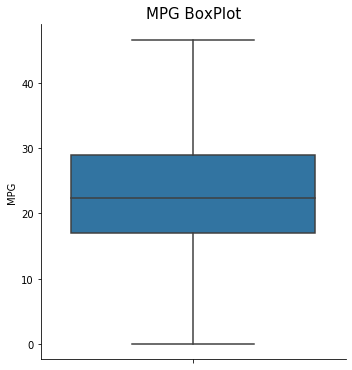

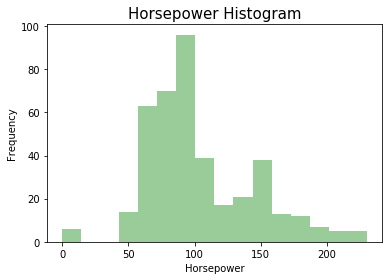

<Figure size 432x288 with 0 Axes>

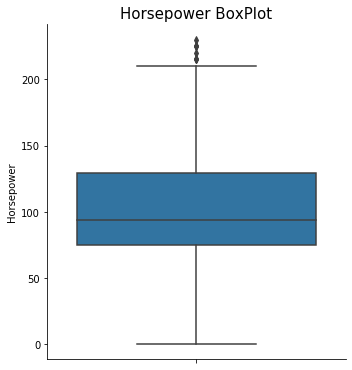

<Figure size 432x288 with 0 Axes>

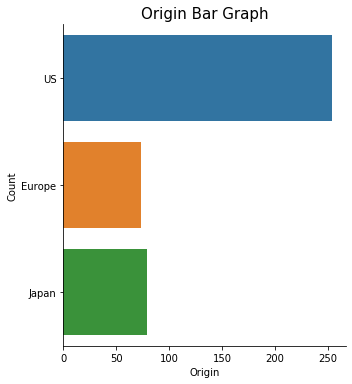

<Figure size 432x288 with 0 Axes>

In [4]:
import pandas as pd
directory=r'C:\Users\Varishu Pant\Desktop\graph_output'
data=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Excel\cars.csv')
graph(data=data,columns=['MPG','Horsepower','Origin'],directory=directory)

### First Improvisation

1.For categorical nominal variables with more than 30 categories,function prints the top 30 most frequent categories to make graphs more readable. This was done keeping in mind variables which have most categories with unit frequency. So plotting those categories is not significant.

2.We added an optional parameter called 'plot_primary_key'(default='no') which takes 2 values ('yes' and 'no').
If value is 'no',function checks for each variable if the variable is made up of all unique values and for such a variable,graphs won't be generated.This was done keeping in mind that datasets often have primary keys which are used to uniqely identify rows but plotting them is not needed.

In [6]:
def graphv2(data,columns=None,directory=None,plot_primary_key='no'):    #Function defintion
    
    import numpy as np                          #Importing required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    import seaborn as sns
    rows=data.shape[0]
            
    if directory is None:                       #Default values for parameters
        directory=os.getcwd()
    if columns is None:
        columns=list(data.columns)
        
    #loop to print graphhs for each variable(Univariate plots)

    
    if plot_primary_key=='no':                  #Checks if a column is a Primary Key
        for column in columns:
            if data[column].nunique()==rows:
                columns.remove(column)
    
    
    
    for column in columns:  
        
        if (data[column].dtype=='float64') | (data[column].dtype=='int64'):
                    
                                                 #Plotting Histograms(user can opt for density curve)
                    sns.distplot(data[column],color='green')
                    plt.title(column+' Histogram', fontsize=15)
                    plt.xlabel(column, fontsize=10)
                    plt.ylabel('Frequency', fontsize=10)
                    plt.savefig(directory+'/'+column+'_HistPlot.png',bbox_inches='tight',pad_inches=1)
                    plt.figure()
              
                                                 #Plotting Box and Whisker Plots
                    box=sns.catplot(data=data,y=column,orient="v", kind="box",sharex=False,sharey=False)
                    plt.title(column+' BoxPlot', fontsize=15)
                    plt.savefig(directory+'/'+column+'_BoxPlot.png',bbox_inches='tight',pad_inches=1)
                    plt.figure()

               
        elif (data[column].dtype=='object') |(data[column].dtype=='bool') :
                                                 #Plotting BarPlots
    
            if data[column].nunique()>30:        #Plot top 30 most frequent categories for readability
                data[column].value_counts()[0:30].plot(kind='bar')
                plt.title(column+' Bar Graph',fontsize=15)
                plt.ylabel('Count')
                plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
                plt.figure()

                continue
                                                #Plot all categories
            bar=sns.catplot(y=column, kind="count",orient='v',data=data)
            plt.title(column+' Bar Graph',fontsize=15)
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
            plt.figure()

     

Testing

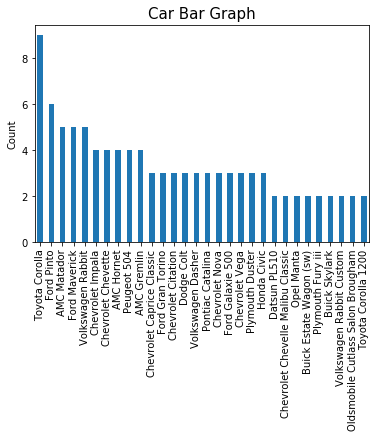

<Figure size 432x288 with 0 Axes>

In [35]:
#data=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Excel\cars.csv')
graphv2(data=data,columns=['Car'],directory=directory)

### Second Improvisation

1.We added 2 optional parameters 'num' and 'cat'( default=True), that take boolean values. If num=False,function won't generate plots for numerical variables. If cat=False,function won't generate plots for categorical variables.

2.We added a parameter named 'discrete_as_cat'(default=None) :Takes in a list of variable names to plot bargraphs for.Some variables with data type 'int64' are actually categorical in nature (like Cylinders),but being a numerical variable, function would plot histogram and boxplot. Now user can give a list of such variables so that they get treated as categorical variables instead.

3.We added a parameter 'kde'(default=True). If set to True, all histograms will have an overlapping density curve.

In [30]:
def graphv3(data,columns=None,directory=None,plot_primary_key='no',kde=True,cat=True,num=True,discrete_as_cat=None):    #Function defintion
    
    import numpy as np                          #Importing required libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    import seaborn as sns
    rows=data.shape[0]
            
    if directory is None:                       #Default values for parameters
        directory=os.getcwd()
    if columns is None:
        columns=list(data.columns)
        
    
    if plot_primary_key=='no':
        for column in columns:
            if data[column].nunique()==rows:
                columns.remove(column)
    
    if discrete_as_cat is not None:               #Subsetting Out Numerical Int Variables as given by user
        columns = [column for column in columns if column not in discrete_as_cat]
    
    for column in columns:                       #loop to print graphhs for each variable(Univariate plots)
  
    
        
        if (data[column].dtype=='float64') | ((data[column].dtype=='int64')):
                if num==True:                    # Checks if user wants to plot graphs for numerical variables
                
                    sns.distplot(data[column],kde=kde,color='green')
                    plt.title(column+' Histogram', fontsize=10)
                    plt.xlabel(column, fontsize=10)
                    plt.ylabel('Frequency', fontsize=10)
                    plt.savefig(directory+'/'+column+'_HistPlot.png',bbox_inches='tight',pad_inches=1)
                    plt.figure()
#             
                   
                    box=sns.catplot(data=data,y=column,orient="v", kind="box",sharex=False,sharey=False)
                    plt.title(column+' BoxPlot', fontsize=10)
                    plt.savefig(directory+'/'+column+'_BoxPlot.png',bbox_inches='tight',pad_inches=1)
                    plt.figure()

               
        elif (data[column].dtype=='object') |(data[column].dtype=='bool') :
                                                #For Categorical Variables or Boolean
            if cat==True:
                if data[column].nunique()>30:   
                    data[column].value_counts()[0:30].plot(kind='bar')
                    plt.title(column+' Bar Graph')
                    plt.xlabel(column)
                    plt.ylabel('Count')
                    plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
                    plt.figure()

                    continue

                bar=sns.catplot(y=column, kind="count",orient='v',data=data)
                plt.title(column+' Bar Graph')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
                plt.figure()
        
    for column in discrete_as_cat:             #Plotting discrete numerical variable as categorical
        if cat==True:
                bar=sns.catplot(y=column, kind="count",orient='v',data=data)
                plt.title(column+' Bar Graph')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.savefig(directory+'/'+column+'_BarPlot.png',bbox_inches='tight',pad_inches=1)
                plt.figure()
        

Testing

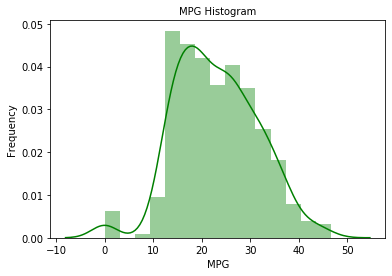

<Figure size 432x288 with 0 Axes>

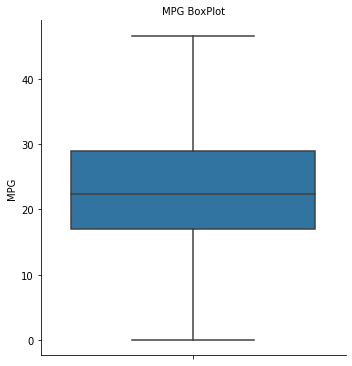

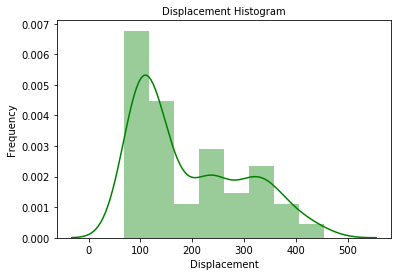

<Figure size 432x288 with 0 Axes>

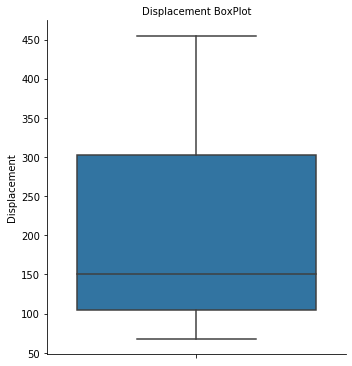

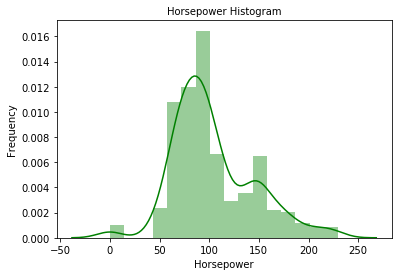

<Figure size 432x288 with 0 Axes>

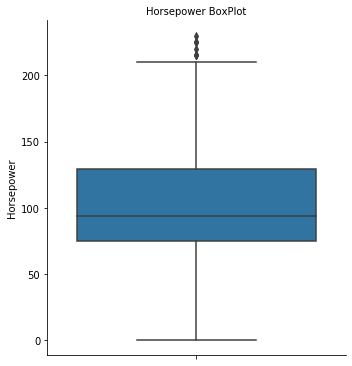

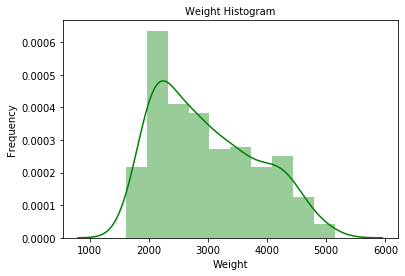

<Figure size 432x288 with 0 Axes>

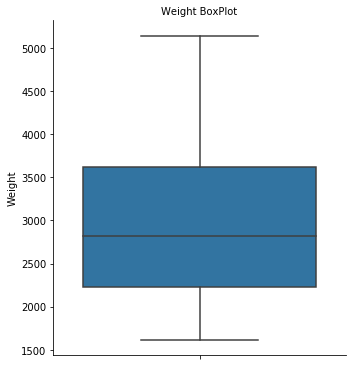

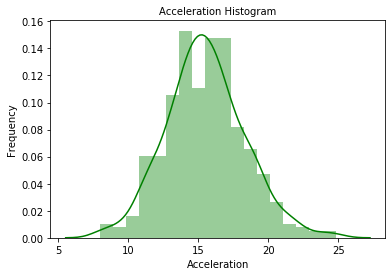

<Figure size 432x288 with 0 Axes>

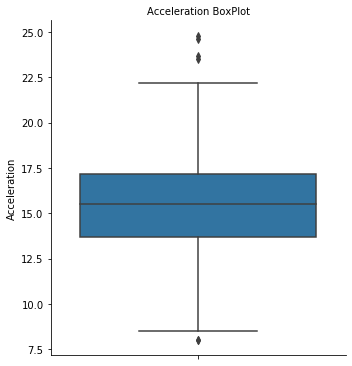

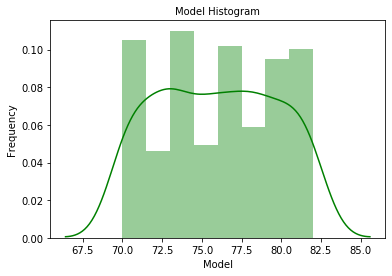

<Figure size 432x288 with 0 Axes>

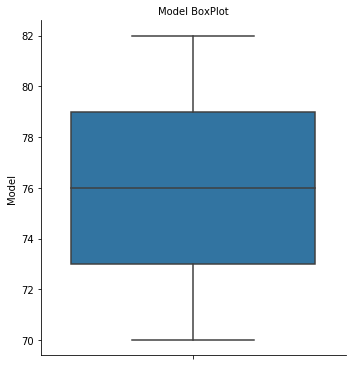

<Figure size 432x288 with 0 Axes>

In [34]:
data=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Excel\cars.csv')

graphv3(data=data,discrete_as_cat=['Cylinders'],cat=False,kde=True,directory=directory)

#Plotting only categorical variables and also 'Cylinders' (data type=integer) treated as qualitative variable